In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
sns.set()

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/gnapoles/data-mining-course/main/diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
#use a hold-out approach instead of k-fold cross validation for the sake of simplicity
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#standardize the data, so that we can use it for k-NN or naive bayes
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
X_test_scaled.shape

(154, 8)

In [19]:
#zero rule

In [33]:
dummy = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
print(classification_report(y_test, y_pred_dummy))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#naive bayes

In [46]:
nb = GaussianNB().fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_accuracy
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [47]:
nb_scaled = GaussianNB().fit(X_train_scaled, y_train)
y_pred_nb_scaled = nb.predict(X_test_scaled)

nb_accuracy_scaled = accuracy_score(y_test, y_pred_nb_scaled)
nb_accuracy
print(classification_report(y_test, y_pred_nb_scaled))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79        99
           1       0.71      0.09      0.16        55

    accuracy                           0.66       154
   macro avg       0.69      0.54      0.47       154
weighted avg       0.68      0.66      0.56       154



/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [34]:
#knn

In [44]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154



In [48]:
knn_scaled = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn.predict(X_test_scaled)

knn_accuracy_scaled = accuracy_score(y_test, y_pred_knn_scaled)
print(classification_report(y_test, y_pred_knn_scaled))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-scor

In [37]:
#decision trees

In [49]:
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [51]:
#random forest

In [53]:
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



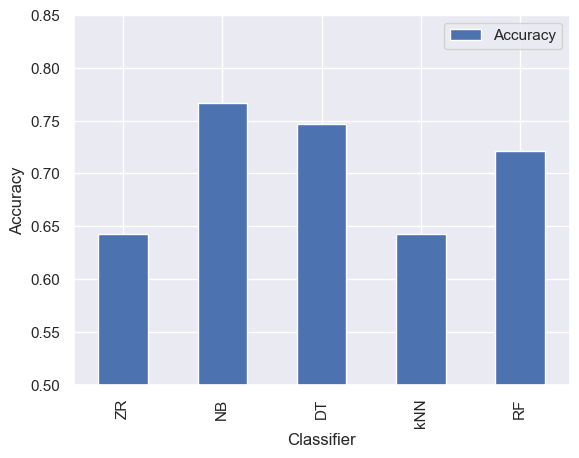

In [54]:
#barplot summary
data = {'Classifier': ['ZR', 'NB', 'DT', 'kNN', 'RF'],
        'Accuracy': [dummy_accuracy, nb_accuracy, dt_accuracy, knn_accuracy, rf_accuracy]}

pd.DataFrame(data).plot(kind='bar', x='Classifier', y='Accuracy', ylim=(0.50,0.85))

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()